# LAB-5: Implementing qRAM

# Name: Neelanjan Dutta

# Register number: 2448040

## Importing packages:

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer
from IPython.display import display

## Helper function:

In [2]:
def run_qram_simulation(qram_circuit, num_address_qubits, num_data_qubits):
    print("State Transitions:")
    simulator = AerSimulator()
    total_qubits = num_address_qubits + num_data_qubits
    
    # Iterate through all possible classical addresses
    for addr_decimal in range(2**num_address_qubits):
        
        # Create a test circuit
        test_circuit = QuantumCircuit(total_qubits)
        addr_binary = format(addr_decimal, 'b').zfill(num_address_qubits)
        
        for i, bit in enumerate(reversed(addr_binary)):
            if bit == '1':
                test_circuit.x(i) 
        
        test_circuit.barrier()
        test_circuit.compose(qram_circuit, inplace=True)
        test_circuit.save_statevector()
        job = simulator.run(test_circuit)
        result = job.result()
        statevector = result.get_statevector()
        
        final_state_decimal = np.argmax(np.abs(statevector))
        final_state_binary = format(final_state_decimal, 'b').zfill(total_qubits)
        
        data_part = final_state_binary[:num_data_qubits]
        address_part = final_state_binary[num_data_qubits:]
        
        initial_data = "0" * num_data_qubits
        print(f"  |{address_part}>|{initial_data}>  -->  |{address_part}>|{data_part}>   (Decimal: M[{addr_decimal}] = {int(data_part, 2)})")

## 1. Implement q-RAM for two data values between 0-3. Use Markdown to to explain the steps. Print the circuit and state transitions


Circuit:


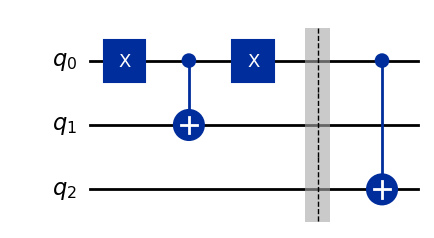

State Transitions:
  |0>|00>  -->  |0>|01>   (Decimal: M[0] = 1)
  |1>|00>  -->  |1>|10>   (Decimal: M[1] = 2)


In [3]:
NUM_ADDRESS_1 = 1 # 1 addredd qubit (a0)
NUM_DATA_1 = 2    # 2 data qubits (d0,d1)
qc1 = QuantumCircuit(NUM_ADDRESS_1 + NUM_DATA_1)

# Logic for M[0] = 1 (binary 01)
qc1.x(0)  # Apply X to a0 (q_0)
qc1.cx(0, 1) # CNOT from a0 (q_0) to d0 (q_1)
qc1.x(0)  # Apply X to a0 (q_0) again

qc1.barrier() # Separate the logic for clarity

# Logic for M[1] = 2 (binary 10)
qc1.cx(0, 2) # CNOT from a0 (q_0) to d1 (q_2)

# Print the circuit
print("\nCircuit:")
display(circuit_drawer(qc1, output='mpl', style='iqp'))

# Run simulation
run_qram_simulation(qc1, NUM_ADDRESS_1, NUM_DATA_1)

## 2. Implement q-Ram for data values more than 4. Print the circuit and state transitions.


Circuit:


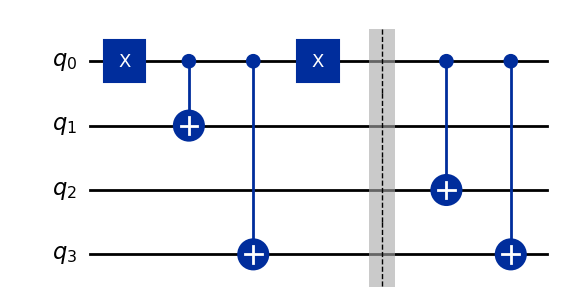

State Transitions:
  |0>|000>  -->  |0>|101>   (Decimal: M[0] = 5)
  |1>|000>  -->  |1>|110>   (Decimal: M[1] = 6)


In [4]:
NUM_ADDRESS_2 = 1  # 1 address qubit (a0)
NUM_DATA_2 = 3     # 3 data qubits (d0, d1, d2)
qc2 = QuantumCircuit(NUM_ADDRESS_2 + NUM_DATA_2)

# Logic for M[0] = 5 (binary 101) 
qc2.x(0)
qc2.cx(0, 1) # Flip d0
qc2.cx(0, 3) # Flip d2
qc2.x(0)
qc2.barrier()

# Logic for M[1] = 6 (binary 110) 
qc2.cx(0, 2) # Flip d1
qc2.cx(0, 3) # Flip d2

# Print the circuit
print("\nCircuit:")
display(circuit_drawer(qc2, output='mpl', style='iqp'))

# Run simulation
run_qram_simulation(qc2, NUM_ADDRESS_2, NUM_DATA_2)

## Experiment to implement q-Ram for more than 2 data values. Print the circuit and state transitions.


Circuit (q_0, q_1 = address; q_2, q_3 = data):


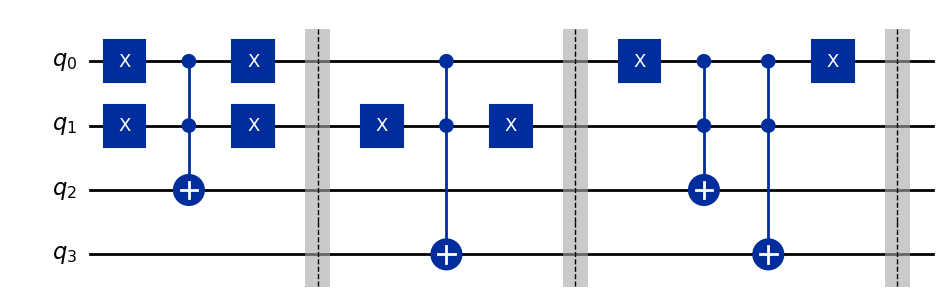

State Transitions:
  |00>|00>  -->  |00>|01>   (Decimal: M[0] = 1)
  |01>|00>  -->  |01>|10>   (Decimal: M[1] = 2)
  |10>|00>  -->  |10>|11>   (Decimal: M[2] = 3)
  |11>|00>  -->  |11>|00>   (Decimal: M[3] = 0)


In [5]:
NUM_ADDRESS_3 = 2  # 2 address qubits (a0, a1)
NUM_DATA_3 = 2     # 2 data qubits (d0, d1)
qc3 = QuantumCircuit(NUM_ADDRESS_3 + NUM_DATA_3)

#  Logic for M[00] = 1 (binary 01) 
qc3.x([0, 1])
qc3.ccx(0, 1, 2) # CCX(a0, a1, d0)
qc3.x([0, 1])
qc3.barrier()

#  Logic for M[01] = 2 (binary 10) 
qc3.x(1) # X on q_1 (a1)
qc3.ccx(0, 1, 3) # CCX(a0, a1, d1)
qc3.x(1)
qc3.barrier()

#  Logic for M[10] = 3 (binary 11) 
qc3.x(0) # X on q_0 (a0)
qc3.ccx(0, 1, 2) # CCX(a0, a1, d0)
qc3.ccx(0, 1, 3) # CCX(a0, a1, d1)
qc3.x(0)
qc3.barrier()

# Print the circuit
print("\nCircuit (q_0, q_1 = address; q_2, q_3 = data):")
display(circuit_drawer(qc3, output='mpl', style='iqp'))

# Run simulation
run_qram_simulation(qc3, NUM_ADDRESS_3, NUM_DATA_3)